#### 2. Find the interest over time for the topic from trends

In [1]:
import re
import numpy as np
import time
import pandas as pd                        
from pytrends.request import TrendReq
#proxies=['https://34.203.233.13:80',]
pytrends = TrendReq(hl='en-US', tz=530, timeout=(10,25), retries=2, backoff_factor=0.1)

In [52]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
  
# curve-fit() function imported from scipy 
from scipy.optimize import curve_fit 
%matplotlib inline

In [35]:
twitter_stuff = {'America',
 'Doland','India-US','Israel','Kamala Harris','President','Save Arnab','Suresh Raina','Taloja Jail',
 'US President','White House','#AEWFullGear','#AbHamariBaariHai','#ArnabGoswamy','#BeKindTowardsAnimals',
 '#BidenHarris','#BiharExitPolls','#BlackDay','#Black_Day_India_Economy','#ByeByeTrump','#ConnectingIndia',
 '#DCvSRH','#DeMonetisation','#GoIndiatickets','#GreenindiaChallenge','#HBDRevanthReddy','#HBDSeeman',
 '#HowdyModi','#Hyderabad4SSR','#LKAdvani','#LaxmiiKalAaRahiHai','#NationStands4Arnab','#SamsungF41',
 '#SundayThoughts','#SweetNight1stWin','#USElectionResults2020','#WBBL06','#WelldoneMandaviyaji','#WrongWorshipInIslam_Live',
 '#YOGIJI_RELEASE_UPPRT_VACANCY','#boxofficeemperorssmb','#congratulationsjoebiden','#puladeshpande','#supremecourtofindia'}



In [36]:
df = pytrends.top_charts(2019, hl='en-US', tz=300, geo='IN')

In [37]:
all_topics = twitter_stuff.union(set(list(df['title'])))
all_topics = list(all_topics)

In [17]:
# Test function with coefficients as parameters 
def func(t, c0,c1,c2,c3): 
    return c0+c1*t-c2*np.sin(-c3*t)

def no_of_days(x):
    temp = [(x[i]-x[0]).days for i in range(len(x))]
    return temp

def get_slope(x,param):
    slope = func(x[-1]+10,param[0],param[1],param[2],param[3]) - func(x[-1]+1,param[0],param[1],param[2],param[3])
    return slope

def pedict_next(x,param,y,n):
    
    y_n = np.empty(n)
    y_p = [func(i,param[0],param[1],param[2],param[3]) for i in x]
    
    xpred = [x[-1]+i for i in range(1,11)]
    ypred = [func(i,param[0],param[1],param[2],param[3]) for i in xpred]

    
    plt.plot(x,y,'b',label = 'Current Trend')
    plt.plot(x,y_p,'r', label = 'Fitted Curve')
    plt.plot(xpred,ypred,'r--', label = 'Prediction for next 10 days')
    plt.legend()


In [26]:
def trend_status(topic, plot = False):
    kw_list = [topic]
    pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='IN', gprop='')
    interest = pytrends.interest_over_time().tail(5)
    interest = interest[interest.columns[0]]
    
    x = no_of_days(list(interest.index))
    y = list(interest)
    n = len(x)

    guess = [100,0.01,100,0.01]
    
    param, param_cov = curve_fit(func, x, y,guess,maxfev = 100000) 
    
    slope = get_slope(x,param)
    
    if plot:
        pedict_next(x,param,y,n)
    
    return slope

120.36444781752652

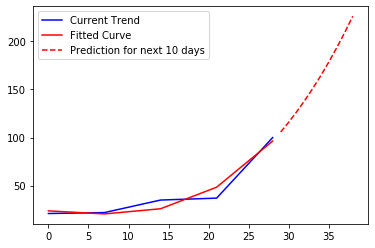

In [28]:
trend_status('Biden',plot = True)

9.90080799660791

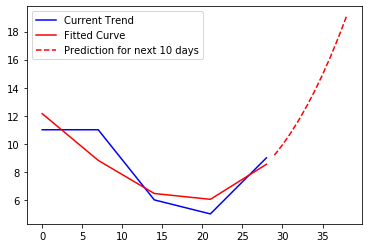

In [29]:
trend_status('Kamala Harris',plot = True)

4.120349903617928

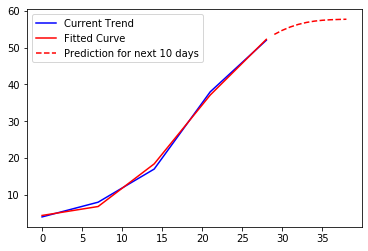

In [30]:
trend_status('Bihar Exit Poll',plot = True)

In [43]:
popularity = {}
for title in all_topics:
    temp = title
    if title.startswith('#'):
        title = title[1:]
        title = re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', title)
        if len(title)<1: 
            continue
        title = ' '.join(title)
    try:
        slope = trend_status(title)
        popularity[temp] = slope
    except Exception as e:
        #print(e)
        #print(title)
        pass
    
    

C:\Users\msais\Anaconda3\envs\gg\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [46]:
popularity

{'#Hyderabad4SSR': 164.00911577761872,
 '#ArnabGoswamy': 4.9665184206215365,
 'President': 0.2647949240657539,
 '#AEWFullGear': 8.462673377868965,
 'Doland': -4.936965932627288,
 '#BidenHarris': 91.20853925317351,
 'Cricket World Cup': 4.4017327560652575e-09,
 'Lok Sabha Elections': 0.39445110735451916,
 '#BeKindTowardsAnimals': 248.73404928846867,
 'NEET results': 48.15552965855209,
 '#AbHamariBaariHai': 60.478025599117125,
 '#BiharExitPolls': 92.68122528985259,
 'Israel': 0.2359459616954087,
 'Suresh Raina': 18.86967039892903,
 '#DeMonetisation': -5.554313821429666e-169,
 'PM Kisan Yojana': 1.3898954547764717,
 'Chandrayaan 2': -0.9897515161580941,
 '#BlackDay': 2.0151940562586788,
 'Joker': -2.7906626343110474e-08,
 'Article 370': -5.554313821429666e-169,
 '#SamsungF41': 12.36472300408547,
 '#USElectionResults2020': 77.06165776727721,
 'Captain Marvel': -1.6137082544339694,
 'Save Arnab': -5.554313821429666e-169,
 'White House': -2.3419222334105907,
 '#LKAdvani': 20.270756609627092,

In [90]:
popularity_db = pd.DataFrame(popularity.items())
popularity_db.columns = ['title','popularity']

In [91]:
scaler = MinMaxScaler()
popularity_db['popularity'] = scaler.fit_transform(popularity_db['popularity'].values.reshape(-1,1))

In [92]:
popularity_db.sort_values(by = 'popularity', ascending=False, inplace=True)

popularity_db.reset_index(inplace=True)
popularity_db['popularity'] = popularity_db['popularity']*100

In [93]:
db_len = len(popularity_db)

In [94]:
popularity_db = popularity_db[['title','popularity']]

In [95]:
popularity_db.at[0, 'popularity'] = popularity_db.at[0, 'popularity'] - 1
popularity_db.at[db_len-1, 'popularity'] = popularity_db.at[db_len-1, 'popularity'] + 1

In [96]:
popularity_db

,title,popularity
0,#BeKindTowardsAnimals,99.000000
1,#Hyderabad4SSR,73.011033
2,#BiharExitPolls,50.289668
3,#BidenHarris,49.820546
4,#USElectionResults2020,45.314084
5,Taloja Jail,40.475046
6,#AbHamariBaariHai,40.031399
7,NEET results,36.106092
8,India-US,34.407401
9,Kamala Harris,28.413920


In [97]:
popularity_db.to_pickle('step2_trendy_data.pkl')